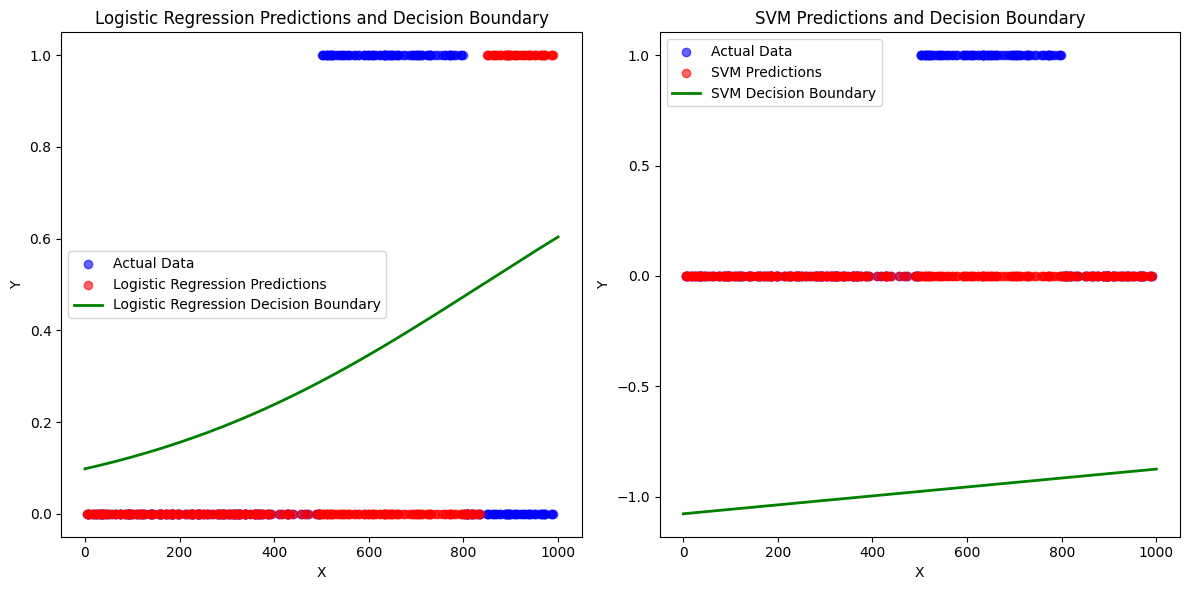

Logistic Regression Accuracy: 0.53
SVM Accuracy: 0.69


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate Data
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 1000, 300).reshape(-1, 1)  # 300 random variables in range [0, 1000]
Y = ((X > 500) & (X < 800)).astype(int).reshape(-1)  # Y = 1 if 500 < X < 800, otherwise Y = 0

# Step 2: Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X, Y)
Y1 = logreg.predict(X)  # Logistic regression predictions

# Step 3: Train Support Vector Machine (SVM) Model
svm = SVC(kernel='linear')  # Linear SVM
svm.fit(X, Y)
Y2 = svm.predict(X)  # SVM predictions

# Step 4: Visualize Results

# Create a mesh grid for decision boundaries visualization
X_range = np.linspace(0, 1000, 1000).reshape(-1, 1)

# Logistic Regression Decision Boundary
y_logreg_prob = logreg.predict_proba(X_range)[:, 1]  # Probability of class 1

# SVM Decision Boundary
y_svm_prob = svm.decision_function(X_range)  # Distance to the hyperplane

# Plot: Logistic Regression results
plt.figure(figsize=(12, 6))

# Actual Data vs Logistic Regression predictions
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(X, Y1, color='red', label='Logistic Regression Predictions', alpha=0.6)
plt.plot(X_range, y_logreg_prob, color='green', label='Logistic Regression Decision Boundary', linewidth=2)
plt.title("Logistic Regression Predictions and Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Plot: SVM results
plt.subplot(1, 2, 2)
plt.scatter(X, Y, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(X, Y2, color='red', label='SVM Predictions', alpha=0.6)
plt.plot(X_range, y_svm_prob, color='green', label='SVM Decision Boundary', linewidth=2)
plt.title("SVM Predictions and Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Step 5: Accuracy Reporting
print(f"Logistic Regression Accuracy: {accuracy_score(Y, Y1):.2f}")
print(f"SVM Accuracy: {accuracy_score(Y, Y2):.2f}")